# DECISION TREE

## 1. DECISION TREE CLASSIFICATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ignore warnings

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
import pandas as pd

# import dataset
# train data
train = pd.read_csv(r"C:\SUHAIL\Reshma miss\IRIS\trainData.csv")
# test data
test = pd.read_csv(r"C:\SUHAIL\Reshma miss\IRIS\testData.csv")


In [3]:
train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,Yes
313,63,1,asymptomatic,140,187,0,2,144,1,4.0,1,2.0,reversable,Yes
314,58,1,nonanginal,140,211,1,2,165,0,0.0,1,0.0,normal,No
315,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes


In [4]:
test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
1,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
2,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,Yes
3,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0,fixed,No
4,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1,fixed,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,67,0,nonanginal,115,564,0,2,160,0,1.6,2,0,reversable,No
133,50,1,nonanginal,129,196,0,0,163,0,0.0,1,0,normal,No
134,53,1,asymptomatic,142,226,0,2,111,1,0.0,1,0,reversable,No
135,64,1,asymptomatic,145,212,0,2,132,0,2.0,2,2,fixed,Yes


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        317 non-null    int64  
 1   Sex        317 non-null    int64  
 2   ChestPain  317 non-null    object 
 3   RestBP     317 non-null    int64  
 4   Chol       317 non-null    int64  
 5   Fbs        317 non-null    int64  
 6   RestECG    317 non-null    int64  
 7   MaxHR      317 non-null    int64  
 8   ExAng      317 non-null    int64  
 9   Oldpeak    317 non-null    float64
 10  Slope      317 non-null    int64  
 11  Ca         314 non-null    float64
 12  Thal       317 non-null    object 
 13  AHD        317 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [6]:
train.shape

(317, 14)

In [7]:
train["AHD"].value_counts()

AHD
No     173
Yes    144
Name: count, dtype: int64

In [8]:
train.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           3
Thal         0
AHD          0
dtype: int64

In [9]:
train.duplicated().sum()

80

In [10]:
data_duplicated = train[train.duplicated(keep=False)]

In [11]:
print("duplicated_values:")
print(data_duplicated)

duplicated_values:
     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
1     63    0  asymptomatic     108   269    0        0    169      1   
6     50    1    nonanginal     140   233    0        0    163      0   
7     56    0    nontypical     140   294    0        2    153      0   
9     67    0    nonanginal     152   277    0        0    172      0   
12    34    0    nontypical     118   210    0        0    192      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
306   68    1    nonanginal     118   277    0        0    151      0   
307   60    0  asymptomatic     158   305    0        2    161      0   
310   39    0    nonanginal     138   220    0        0    152      0   
314   58    1    nonanginal     140   211    1        2    165      0   
315   63    0  asymptomatic     108   269    0        0    169      1   

     Oldpeak  Slope   Ca        Thal  AHD  
1        1.8      2  2.0      normal  Yes  
6        0.6    

In [12]:
train = train.drop_duplicates()

In [13]:
train.shape

(237, 14)

In [14]:
train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,42,0,asymptomatic,102,265,0,2,122,0,0.6,2,0.0,normal,No
311,51,1,nonanginal,110,175,0,0,123,0,0.6,1,0.0,normal,No
312,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,Yes
313,63,1,asymptomatic,140,187,0,2,144,1,4.0,1,2.0,reversable,Yes


In [15]:
train.reset_index(drop=True, inplace=True)

In [16]:
train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,42,0,asymptomatic,102,265,0,2,122,0,0.6,2,0.0,normal,No
233,51,1,nonanginal,110,175,0,0,123,0,0.6,1,0.0,normal,No
234,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,Yes
235,63,1,asymptomatic,140,187,0,2,144,1,4.0,1,2.0,reversable,Yes


In [17]:
train["Ca"].isna().sum()

3

In [18]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit and transform the imputer on your training data
train["Ca"] = imputer.fit_transform(train[["Ca"]])

In [19]:
train["ChestPain"].nunique()

4

In [20]:
train["Thal"].nunique()

3

In [21]:
train.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [22]:
train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,49,1,nonanginal,118,149,0,2,126,0,0.8,1,3.0,normal,Yes
1,63,0,asymptomatic,108,269,0,0,169,1,1.8,2,2.0,normal,Yes
2,59,1,typical,160,273,0,2,125,0,0.0,1,0.0,normal,Yes
3,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable,Yes
4,47,1,nonanginal,108,243,0,0,152,0,0.0,1,0.0,normal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,42,0,asymptomatic,102,265,0,2,122,0,0.6,2,0.0,normal,No
233,51,1,nonanginal,110,175,0,0,123,0,0.6,1,0.0,normal,No
234,43,0,asymptomatic,132,341,1,2,136,1,3.0,2,0.0,reversable,Yes
235,63,1,asymptomatic,140,187,0,2,144,1,4.0,1,2.0,reversable,Yes


In [23]:
from sklearn.preprocessing import OneHotEncoder
# oneHot encoding
onehot_columns = ["ChestPain", "Thal", "AHD"]

In [24]:
# Apply to OneHot Encoder
onehot_encoder = OneHotEncoder(sparse=False, drop="first")
train_encoded = onehot_encoder.fit_transform(train[onehot_columns])

In [25]:
ohe_feature_names = onehot_encoder.get_feature_names_out(input_features=onehot_columns)
ohe_feature_names

array(['ChestPain_nonanginal', 'ChestPain_nontypical',
       'ChestPain_typical', 'Thal_normal', 'Thal_reversable', 'AHD_Yes'],
      dtype=object)

In [26]:
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe_feature_names)
train[ohe_feature_names] = train_encoded_df

In [27]:
train.drop(columns=onehot_columns, inplace=True)
train

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,49,1,118,149,0,2,126,0,0.8,1,3.0,1.0,0.0,0.0,1.0,0.0,1.0
1,63,0,108,269,0,0,169,1,1.8,2,2.0,0.0,0.0,0.0,1.0,0.0,1.0
2,59,1,160,273,0,2,125,0,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,59,1,140,177,0,0,162,1,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,47,1,108,243,0,0,152,0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,42,0,102,265,0,2,122,0,0.6,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
233,51,1,110,175,0,0,123,0,0.6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
234,43,0,132,341,1,2,136,1,3.0,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0
235,63,1,140,187,0,2,144,1,4.0,1,2.0,0.0,0.0,0.0,0.0,1.0,1.0


In [28]:
train.isna().sum()

Age                     0
Sex                     0
RestBP                  0
Chol                    0
Fbs                     0
RestECG                 0
MaxHR                   0
ExAng                   0
Oldpeak                 0
Slope                   0
Ca                      0
ChestPain_nonanginal    0
ChestPain_nontypical    0
ChestPain_typical       0
Thal_normal             0
Thal_reversable         0
AHD_Yes                 0
dtype: int64

In [29]:
train.rename(columns={'AHD_Yes': 'AHD'}, inplace=True)

In [30]:
train

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD
0,49,1,118,149,0,2,126,0,0.8,1,3.0,1.0,0.0,0.0,1.0,0.0,1.0
1,63,0,108,269,0,0,169,1,1.8,2,2.0,0.0,0.0,0.0,1.0,0.0,1.0
2,59,1,160,273,0,2,125,0,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,59,1,140,177,0,0,162,1,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,47,1,108,243,0,0,152,0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,42,0,102,265,0,2,122,0,0.6,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
233,51,1,110,175,0,0,123,0,0.6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
234,43,0,132,341,1,2,136,1,3.0,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0
235,63,1,140,187,0,2,144,1,4.0,1,2.0,0.0,0.0,0.0,0.0,1.0,1.0


In [31]:
# select features
x_train = train.iloc[:,0:16]
y_train = train["AHD"]

In [32]:
# for test data
test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
1,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
2,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,Yes
3,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0,fixed,No
4,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1,fixed,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,67,0,nonanginal,115,564,0,2,160,0,1.6,2,0,reversable,No
133,50,1,nonanginal,129,196,0,0,163,0,0.0,1,0,normal,No
134,53,1,asymptomatic,142,226,0,2,111,1,0.0,1,0,reversable,No
135,64,1,asymptomatic,145,212,0,2,132,0,2.0,2,2,fixed,Yes


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        137 non-null    int64  
 1   Sex        137 non-null    int64  
 2   ChestPain  137 non-null    object 
 3   RestBP     137 non-null    int64  
 4   Chol       137 non-null    int64  
 5   Fbs        137 non-null    int64  
 6   RestECG    137 non-null    int64  
 7   MaxHR      137 non-null    int64  
 8   ExAng      137 non-null    int64  
 9   Oldpeak    137 non-null    float64
 10  Slope      137 non-null    int64  
 11  Ca         137 non-null    int64  
 12  Thal       137 non-null    object 
 13  AHD        137 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 15.1+ KB


In [34]:
test.shape

(137, 14)

In [35]:
test.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [36]:
test.duplicated().sum()

17

In [37]:
data_duplicated = test[test.duplicated(keep=False)]
print("duplicated values:")
print(data_duplicated)

duplicated values:
     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
11    44    1    nonanginal     130   233    0        0    179      1   
12    65    0  asymptomatic     150   225    0        2    114      0   
19    60    1  asymptomatic     130   253    0        0    144      1   
26    52    1    nontypical     120   325    0        0    172      0   
27    62    0  asymptomatic     160   164    0        2    145      0   
29    44    0    nonanginal     108   141    0        0    175      0   
39    51    1  asymptomatic     140   261    0        2    186      1   
46    60    0    nonanginal     102   318    0        0    160      0   
47    55    1  asymptomatic     160   289    0        2    145      1   
50    53    1  asymptomatic     142   226    0        2    111      1   
53    64    1  asymptomatic     145   212    0        2    132      0   
57    54    1    nontypical     192   283    0        2    195      0   
58    68    0    nonanginal     

In [38]:
test.drop_duplicates(inplace=True)

In [39]:
test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
1,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
2,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,Yes
3,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0,fixed,No
4,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1,fixed,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,44,1,nonanginal,140,235,0,2,180,0,0.0,1,0,normal,No
128,67,0,nonanginal,115,564,0,2,160,0,1.6,2,0,reversable,No
129,55,0,nontypical,132,342,0,0,166,0,1.2,1,0,normal,No
130,55,1,asymptomatic,132,353,0,0,132,1,1.2,2,1,reversable,Yes


In [40]:
test.reset_index(drop=True, inplace=True)

In [41]:
test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
1,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2,normal,Yes
2,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0,reversable,Yes
3,57,1,asymptomatic,140,192,0,0,148,0,0.4,2,0,fixed,No
4,56,1,nonanginal,130,256,1,2,142,1,0.6,2,1,fixed,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,44,1,nonanginal,140,235,0,2,180,0,0.0,1,0,normal,No
116,67,0,nonanginal,115,564,0,2,160,0,1.6,2,0,reversable,No
117,55,0,nontypical,132,342,0,0,166,0,1.2,1,0,normal,No
118,55,1,asymptomatic,132,353,0,0,132,1,1.2,2,1,reversable,Yes


In [42]:
# Applying onehot encoding
test_encoded = onehot_encoder.transform(test[onehot_columns])

In [43]:
test_encoded = pd.DataFrame(test_encoded, columns=ohe_feature_names)
test[ohe_feature_names] = test_encoded

In [44]:
test.drop(columns=onehot_columns, inplace=True)

In [45]:
test

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,37,1,130,250,0,0,187,0,3.5,3,0,1.0,0.0,0.0,1.0,0.0,0.0
1,62,0,140,268,0,2,160,0,3.6,3,2,0.0,0.0,0.0,1.0,0.0,1.0
2,53,1,140,203,1,2,155,1,3.1,3,0,0.0,0.0,0.0,0.0,1.0,1.0
3,57,1,140,192,0,0,148,0,0.4,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,56,1,130,256,1,2,142,1,0.6,2,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,44,1,140,235,0,2,180,0,0.0,1,0,1.0,0.0,0.0,1.0,0.0,0.0
116,67,0,115,564,0,2,160,0,1.6,2,0,1.0,0.0,0.0,0.0,1.0,0.0
117,55,0,132,342,0,0,166,0,1.2,1,0,0.0,1.0,0.0,1.0,0.0,0.0
118,55,1,132,353,0,0,132,1,1.2,2,1,0.0,0.0,0.0,0.0,1.0,1.0


In [46]:
test.rename(columns={'AHD_Yes': 'AHD'}, inplace=True)
test

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD
0,37,1,130,250,0,0,187,0,3.5,3,0,1.0,0.0,0.0,1.0,0.0,0.0
1,62,0,140,268,0,2,160,0,3.6,3,2,0.0,0.0,0.0,1.0,0.0,1.0
2,53,1,140,203,1,2,155,1,3.1,3,0,0.0,0.0,0.0,0.0,1.0,1.0
3,57,1,140,192,0,0,148,0,0.4,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,56,1,130,256,1,2,142,1,0.6,2,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,44,1,140,235,0,2,180,0,0.0,1,0,1.0,0.0,0.0,1.0,0.0,0.0
116,67,0,115,564,0,2,160,0,1.6,2,0,1.0,0.0,0.0,0.0,1.0,0.0
117,55,0,132,342,0,0,166,0,1.2,1,0,0.0,1.0,0.0,1.0,0.0,0.0
118,55,1,132,353,0,0,132,1,1.2,2,1,0.0,0.0,0.0,0.0,1.0,1.0


In [47]:
# select features for tset
x_test = test.iloc[:,0:16]
y_test = test["AHD"]

### Decision tree

In [48]:
from sklearn import tree
from IPython.display import Image, display

In [49]:
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=3, max_features="sqrt")

In [50]:
# train the decision tree
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt')

In [51]:
!pip install --upgrade sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

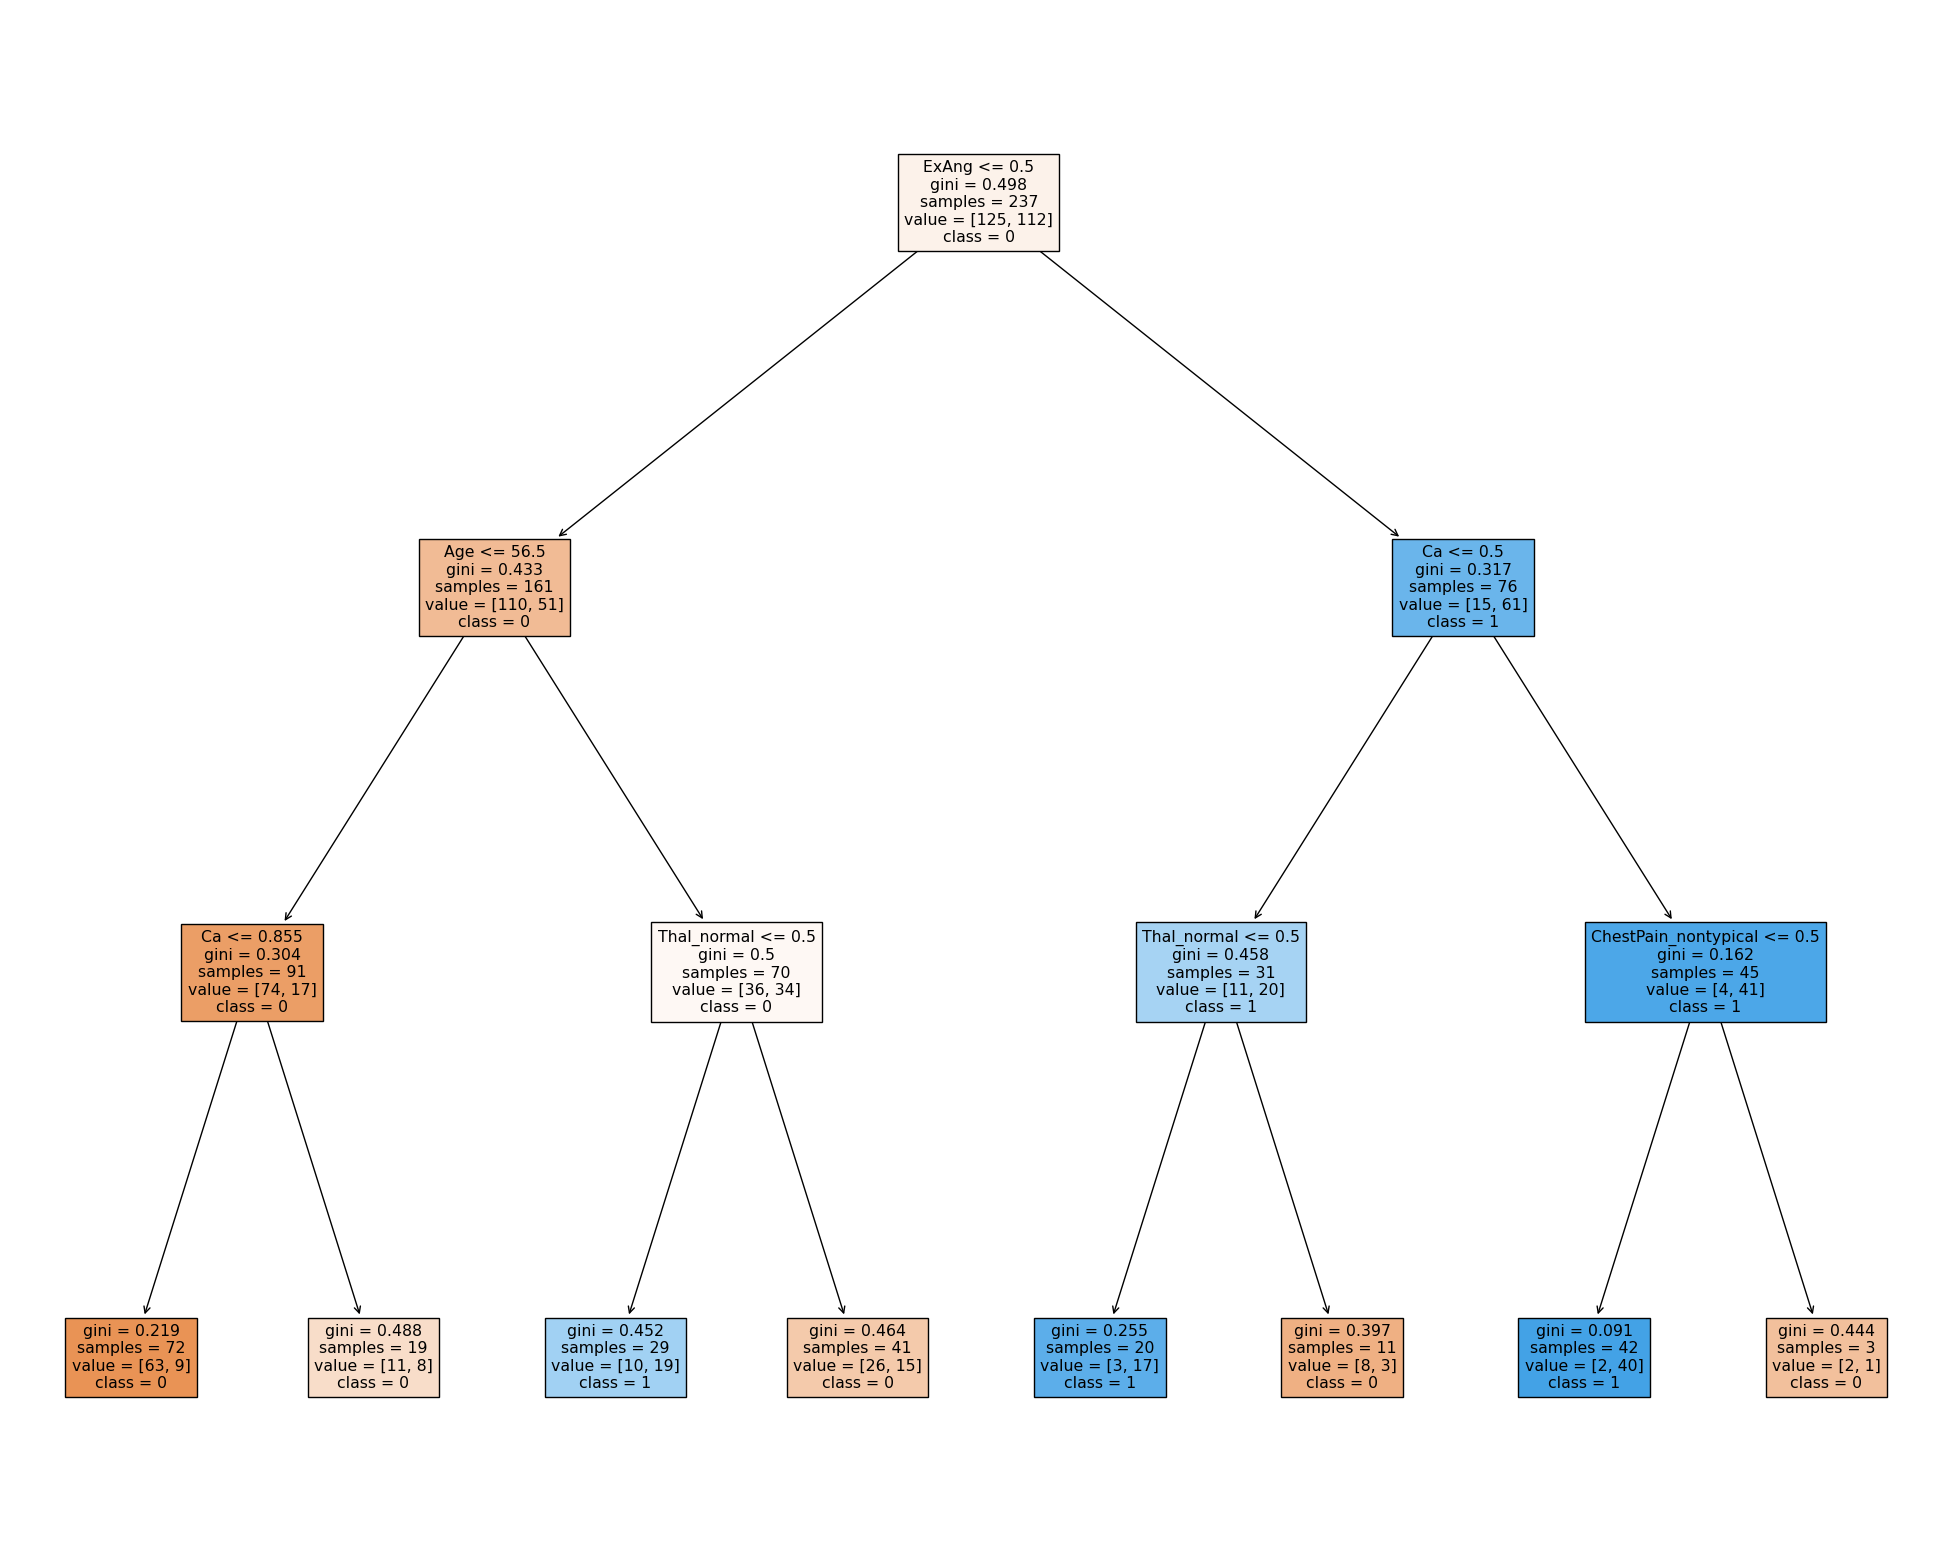

In [52]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming 'dtree' is your decision tree model and 'X_train' is your training data
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dtree, 
                   feature_names=x_train.columns.tolist(),  # Convert index to list if X_train is a pandas DataFrame
                   class_names=['0', '1'],
                   filled=True)
plt.show()

In [53]:
y_pred_train = dtree.predict(x_train)

In [54]:
y_pred_train

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1.

In [55]:
y_pred_train.shape

(237,)

In [56]:
pd.crosstab(y_train, y_pred_train)

col_0,0.0,1.0
AHD,,
0.0,110,15
1.0,36,76


In [57]:
y_train

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
232    0.0
233    0.0
234    1.0
235    1.0
236    1.0
Name: AHD, Length: 237, dtype: float64

In [58]:
y_pred_train

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1.

In [59]:
pd.DataFrame(y_train, y_pred_train)

,AHD
0.0,1.0
1.0,1.0
0.0,1.0
1.0,1.0
0.0,1.0
...,...
0.0,1.0
0.0,1.0
1.0,1.0
1.0,1.0


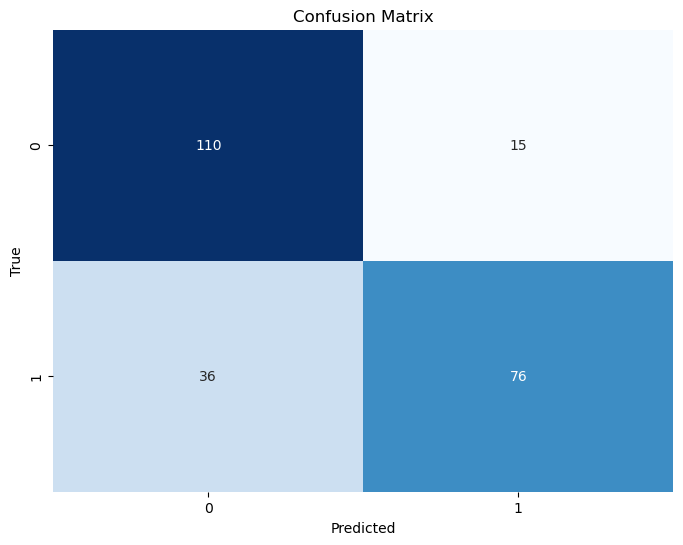

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_train, y_pred_train)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
dtree.score(x_train, y_train)

0.7848101265822784

In [62]:
dtree.score(x_test, y_test)

0.775

In [63]:
y_pred_test = dtree.predict(x_test)

In [64]:
y_pred_test

array([0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0.])

In [65]:
pd.crosstab(y_test, y_pred_test)

col_0,0.0,1.0
AHD,,
0.0,53,14
1.0,13,40


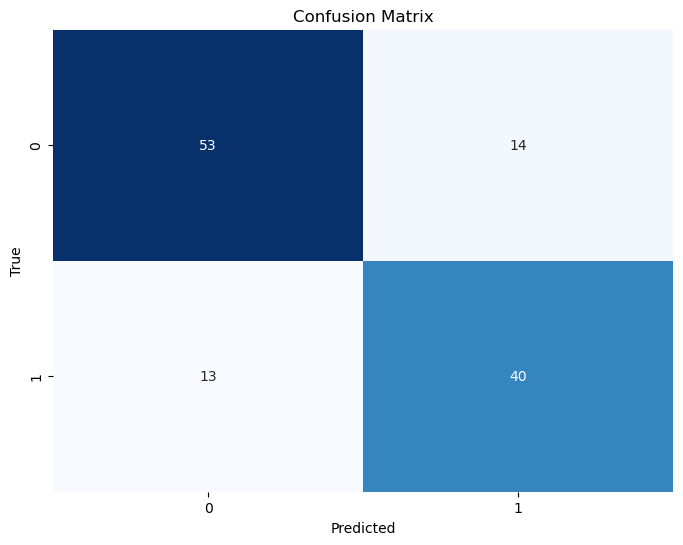

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Model Evaluation

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [68]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)

In [69]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

In [70]:
d1 = {"Train":["train_accuracy","train_precision", "train_recall", "train_f1", "train_roc_auc"], "Values":[train_accuracy,train_precision,train_recall,train_f1,train_roc_auc]}
d2 = {"Test":["test_accuracy","test_precision","test_recall","test_f1","test_roc_auc"], "Values":[test_accuracy,test_precision,test_recall,test_f1,test_roc_auc]}

In [71]:
pd.DataFrame(d1)

,Train,Values
0,train_accuracy,0.784810
1,train_precision,0.835165
2,train_recall,0.678571
3,train_f1,0.748768
4,train_roc_auc,0.779286


In [72]:
pd.DataFrame(d2)

,Test,Values
0,test_accuracy,0.775000
1,test_precision,0.740741
2,test_recall,0.754717
3,test_f1,0.747664
4,test_roc_auc,0.772881


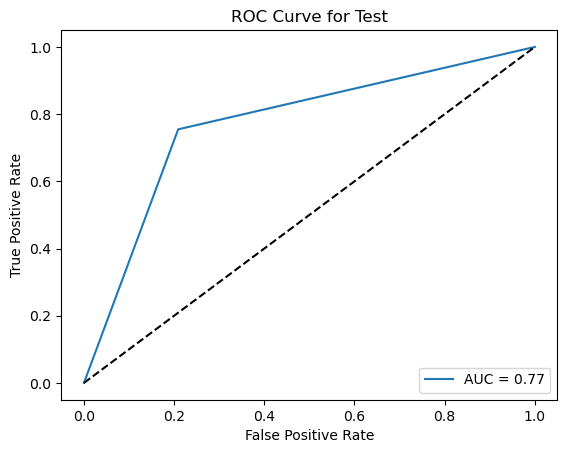

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities or scores (y_scores) and true binary labels (y_true)
# y_scores should be the predicted probabilities of the positive class
# y_true should be the true binary labels (0 or 1)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_test)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test')
plt.legend(loc='lower right')
plt.show()

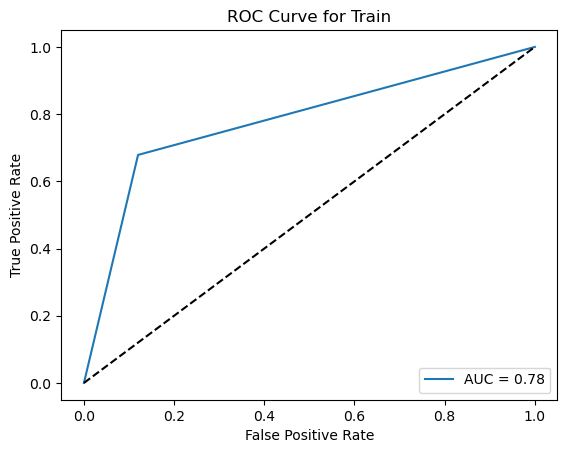

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities or scores (y_scores) and true binary labels (y_true)
# y_scores should be the predicted probabilities of the positive class
# y_true should be the true binary labels (0 or 1)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_train, y_pred_train)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train')
plt.legend(loc='lower right')
plt.show()

## 2. DESICION TREE REGRESSION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this wii not show")

In [2]:
# import data sets

data = pd.read_csv(r"C:\SUHAIL\Reshma miss\Avacado_Price.csv")

In [3]:
data.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,Xlarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.describe()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,Xlarge_Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
data.isna().sum()

AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
Xlarge_Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
data.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'Xlarge_Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   tot_ava1      18249 non-null  float64
 3   tot_ava2      18249 non-null  float64
 4   tot_ava3      18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   Xlarge_Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
data["type"].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [11]:
data["region"].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [11]:
data.duplicated().sum()

0

In [12]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [13]:
data['region'] = labelencoder.fit_transform(data['region'])

In [14]:
data['type'] = labelencoder.fit_transform(data['type'])

In [15]:
data

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,Xlarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [16]:
data['region'].nunique(), data['type'].nunique()

(54, 2)

In [17]:
x = data.iloc[:,1:]
y = data["AveragePrice"]

In [18]:
# split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14599, 11), (3650, 11), (14599,), (3650,))

### Model building

In [20]:
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor(max_depth=3)

In [21]:
# fit the model
tree_r.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [22]:
# predictions
y_pred_train = tree_r.predict(x_train)
y_pred_test = tree_r.predict(x_test)

In [23]:
y_pred_train

array([1.78114808, 1.14269964, 1.78114808, ..., 1.14269964, 1.14269964,
       1.78114808])

In [24]:
y_pred_test

array([1.32264216, 1.14269964, 1.63402027, ..., 0.86426421, 1.63402027,
       1.78114808])

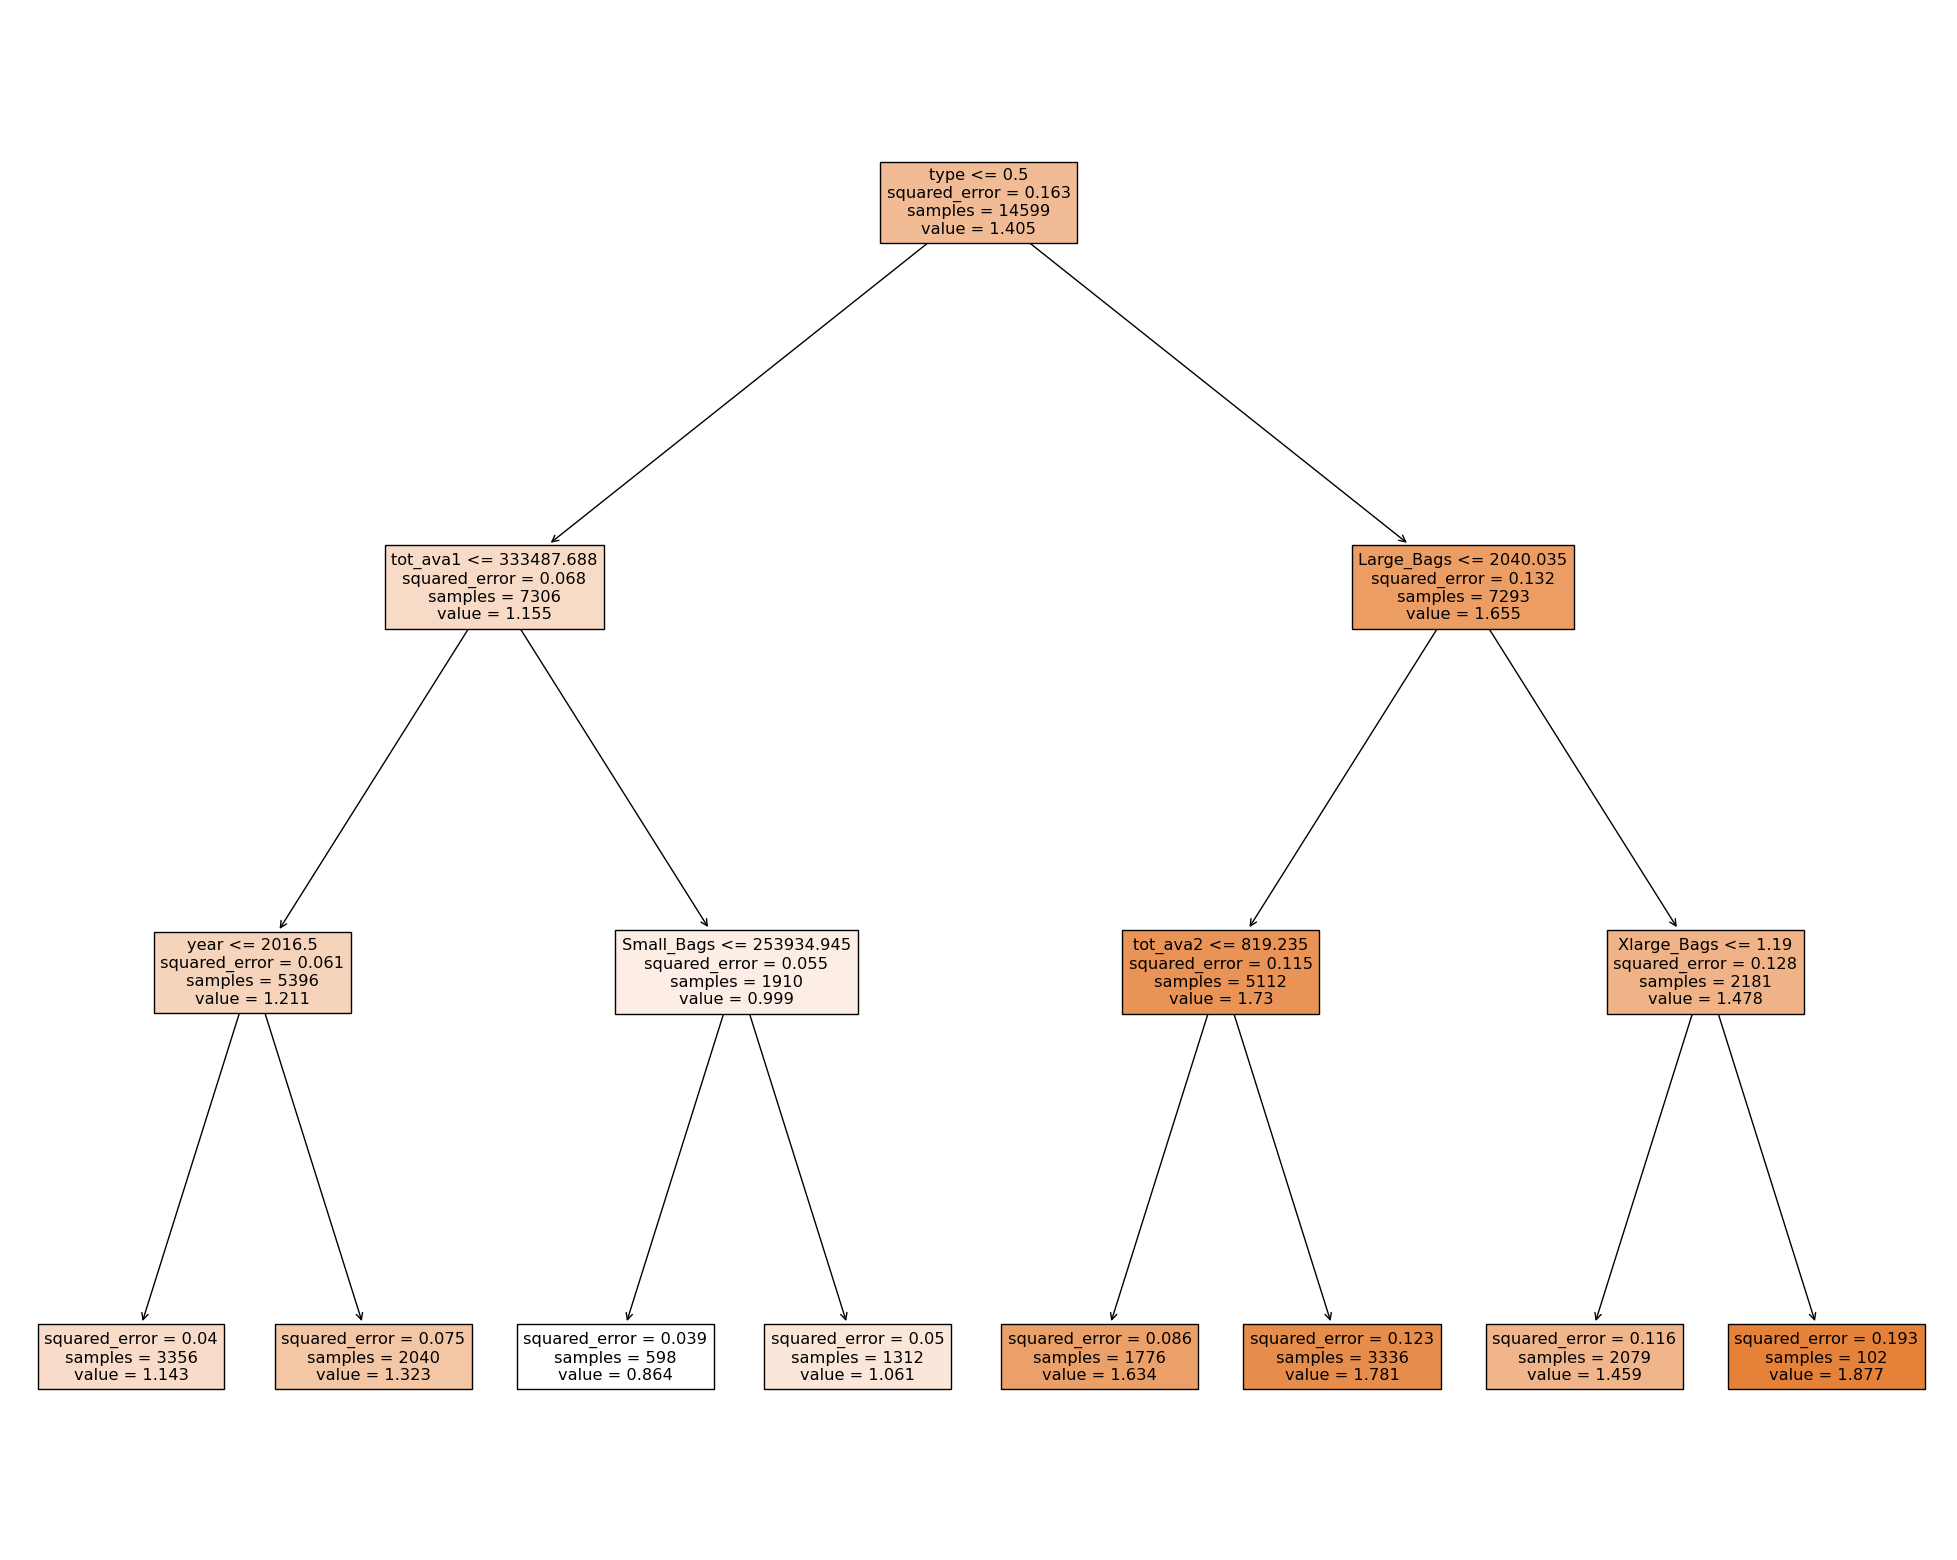

In [25]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_r, feature_names=x_train.columns.to_list(),filled=True)

### Model Evaluation

In [26]:
# accuracy score for tarin and test datas

train_accuracy = tree_r.score(x_train, y_train)
test_accuracy = tree_r.score(x_test, y_test)

In [27]:
print("train accuracy:" ,train_accuracy)
print("test accuracy:" ,test_accuracy)

train accuracy: 0.49272521511834366
test accuracy: 0.4674037868713041


In [28]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the independent variables for the model
x = add_constant(x_train)

# Calculate VIF
vif = pd.DataFrame()
vif['variable'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Filter out of the constant term
vif = vif[vif['variable'] != 'const']
print(vif)

        variable           VIF
1   Total_Volume  4.176355e+09
2       tot_ava1  5.567477e+08
3       tot_ava2  5.149684e+08
4       tot_ava3  4.173225e+06
5     Total_Bags  2.144571e+14
6     Small_Bags  1.233863e+14
7     Large_Bags  1.338365e+13
8    Xlarge_Bags  7.188851e+10
9           type  1.063081e+00
10          year  1.049270e+00
11        region  1.071094e+00


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# RMSE
mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(mse)
print("Train_RMSE:" ,train_rmse)

mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(mse)
print("Test_RMSE:" ,test_rmse)

Train_RMSE: 0.28711079883642365
Test_RMSE: 0.29252648656465896


In [31]:
# R-Squared
# For train
train_rsquared = r2_score(y_train, y_pred_train)
print("R-squared train data:" ,train_rsquared)

# For test
test_rsquared = r2_score(y_test, y_pred_test)
print("R-squared test data:" ,test_rsquared)

R-squared train data: 0.49272521511834366
R-squared test data: 0.4674037868713041


In [32]:
# Check to the Adjusted R Squared
def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared)*(n - 1)/(n - k - 1)
    return adjusted_r2

In [33]:
# For train data
n_train, k = x_train.shape[0], x_train.shape[1]
train_adjusted_r = adjusted_r_squared(train_rsquared, n_train, k)

In [34]:
# For test data
n_test = x_test.shape[0]
test_adjusted_r = adjusted_r_squared(test_rsquared, n_test, k)

In [35]:
print("Adjusted R_Squared for train:" ,train_adjusted_r)
print("Adjusted R_Squared for test:" ,test_adjusted_r)

Adjusted R_Squared for train: 0.492342681174853
Adjusted R_Squared for test: 0.46579340799708324


In [36]:
df = {"TITLE":["train accuracy","test accuracy","train rmse","test rmse","train r squared","test r squared","train adju r squared","test adju r squared"], "VALUES":[train_accuracy,test_accuracy,train_rmse,test_rmse,train_rsquared,test_rsquared,train_adjusted_r,test_adjusted_r]}

In [37]:
pd.DataFrame(df)

,TITLE,VALUES
0,train accuracy,0.492725
1,test accuracy,0.467404
2,train rmse,0.287111
3,test rmse,0.292526
4,train r squared,0.492725
5,test r squared,0.467404
6,train adju r squared,0.492343
7,test adju r squared,0.465793
